In [12]:
import tensorflow as tf

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)

In [15]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\laure\.keras\datasets\flower_photos


In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3666

In [17]:
CLASS_NAMES = [item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]
print(CLASS_NAMES)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [18]:
import random
from basicCNN import *

IMG_SIZE = 50
training_data , testing_data,  distribution = create_training_data(data_dir, IMG_SIZE, CLASS_NAMES)



In [19]:
print(len(training_data))
i = 0
for elem in distribution:
    print('Proportion of ' + str(CLASS_NAMES[i]))
    print(elem / image_count)
    i+=1

2749
Proportion of daisy
0.1723949809056192
Proportion of dandelion
0.24440807419530824
Proportion of roses
0.1745771958537916
Proportion of sunflowers
0.190671031096563
Proportion of tulips
0.21794871794871795


This image


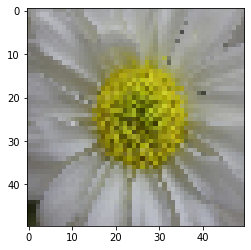

is represented like this to our code 
 
[[[142 143 143]
  [151 149 149]
  [165 159 159]
  ...
  [172 168 168]
  [157 157 157]
  [151 153 153]]

 [[132 135 136]
  [149 151 151]
  [178 173 173]
  ...
  [164 159 160]
  [156 156 156]
  [146 146 147]]

 [[108 120 122]
  [149 151 151]
  [156 153 153]
  ...
  [161 157 158]
  [157 157 157]
  [127 131 132]]

 ...

 [[ 18  39  36]
  [ 27  44  41]
  [ 91  94  94]
  ...
  [120 123 126]
  [119 124 126]
  [115 121 124]]

 [[ 21  44  41]
  [ 25  48  44]
  [ 79  86  88]
  ...
  [129 129 133]
  [121 124 128]
  [121 124 128]]

 [[ 26  47  44]
  [ 29  50  48]
  [ 59  70  71]
  ...
  [135 136 140]
  [129 130 134]
  [125 126 130]]]


In [20]:
X , y = restructure_data(training_data)
print('This image')
fix_colors = cv2.cvtColor(training_data[0][0], cv2.COLOR_BGR2RGB)
plt.imshow(fix_colors)
plt.show()
print('is represented like this to our code \n ')
print(training_data[0][0])
#print(testing_data[0][0])


In [21]:
X = X/255.0

model = build_model(X,y,len(CLASS_NAMES))

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 1924 samples, validate on 825 samples
Epoch 1/3
1924/1924 [==============================] - 42s 22ms/sample - loss: 1.2524 - acc: 0.4662 - val_loss: 6.6499 - val_acc: 0.1091
Epoch 2/3
1924/1924 [==============================] - 43s 22ms/sample - loss: 0.8572 - acc: 0.6445 - val_loss: 8.6282 - val_acc: 0.1782
Epoch 3/3
1924/1924 [==============================] - 38s 20ms/sample - loss: 0.7575 - acc: 0.7006 - val_loss: 7.9344 - val_acc: 0.1455


In [22]:
X_test, y_test = restructure_data(training_data)
predictions = model.predict(X_test)

The model predicted that this image is a daisy


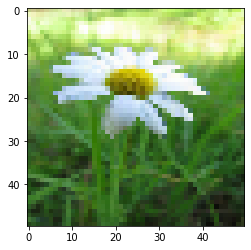

In [23]:
import random
check = random.randint(0,len(X_test)-1)
print('The model predicted that this image is a ' + CLASS_NAMES[np.argmax(predictions[check])])
fix_colors = cv2.cvtColor(X_test[check], cv2.COLOR_BGR2RGB)
plt.imshow(fix_colors)
plt.show()